## <center> `Spam SMS Detection` </center>

`Dataset:`
The SMS Spam Collection is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5,574 messages, tagged acording being ham (legitimate) or spam.

`Objective:`
Build an AI model that can classify SMS messages as spam or legitimate. Use techniques like TF-IDF or word embeddings with classifiers like Naive Bayes, Logistic Regression, or Support Vector Machines to identify spam messages


<a class="anchor" id="0.1"></a>
# **Table of Contents** 

1.	[Data Preparation](#1)
1.	[Exploratory Data Analysis](#2)
1.	[Feature Engineering with TF-IDF](#3)
1.	[Train Test Spliting](#3)
1.  [Model Building - UnBalanced Class](#4)
    * [Naive Bayes & Hyperparameter Tuning](#5)
    * [Logistic Regression & Hyperparameter Tuning](#6)
    * [Support Vector Machine & Hyperparameter Tuning](#7)
1.	[Balancing Data](#8)
1.  [Model Building - Balanced Class](#9)
    * [Naive Bayes & Hyperparameter Tuning](#10)
    * [Logistic Regression & Hyperparameter Tuning](#11)
    * [Support Vector Machine & Hyperparameter Tuning](#12)
1.  [Evaluation](#13)
1.	[Deployment](#14)
1.	[Interpretation & Conclusion](#15)
1.	[Reference](#16)


## Data Preparation
<a class="anchor" id="1"></a>
[Table of Contents](#0.1)

In [1]:
# import modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
import joblib
import warnings #ignore warning
warnings.filterwarnings("ignore")

In [2]:
# Define file path
filepath ="D://Portfolio//Internship//AFAME//Project details//Spam SMS Detection//spam.csv"
# Read the CSV file into a DataFrame with specified encoding
data = pd.read_csv(filepath, encoding='latin1')
# Display the first few rows of the DataFrame
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
# removing excess unnecessary column 
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [5]:
# Checking null values
data.isnull().sum()

v1    0
v2    0
dtype: int64

In [6]:
# Checking duplicated values
data.duplicated().sum()

403

We are retaining the duplicate values as they are crucial for our task of identifying spam SMS messages.

In [7]:
# Viewing values in 'v1' column
data['v1'].value_counts()

v1
ham     4825
spam     747
Name: count, dtype: int64

In [8]:
# Viewing unique values in 'v2'
data['v2'].nunique()

5169

## Exploratory Data Analysis
<a class="anchor" id="2"></a>
[Table of Contents](#0.1)

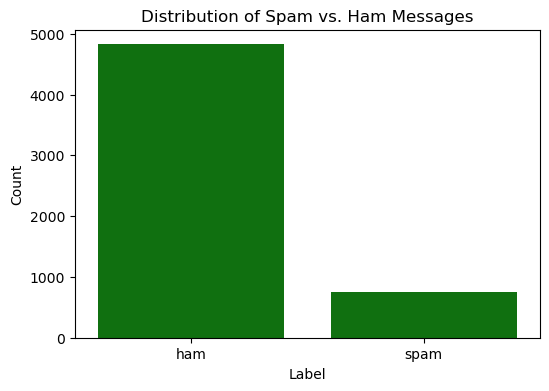

In [9]:
# Distribution of spam vs. ham messages
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='v1', color='green')
plt.title('Distribution of Spam vs. Ham Messages')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

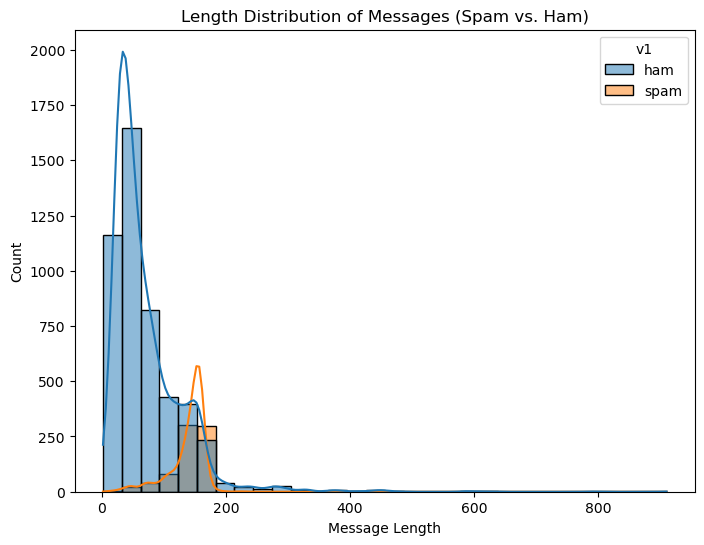

In [10]:
# Distribution of message lengths
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x=data['v2'].apply(len), bins=30, hue='v1', kde=True)
plt.title('Length Distribution of Messages (Spam vs. Ham)')
plt.xlabel('Message Length')
plt.ylabel('Count')
plt.show()

## 3.Feature Engineering with Tf-IDF

<a class="anchor" id="3"></a>
[Table of Contents](#0.3)

In [11]:
# Preprocess data
data['v2'] = data['v2'].str.replace('\W', ' ').str.lower()

In [12]:
# Importing TfidVectorizer 
from sklearn.feature_extraction.text import TfidfVectorizer
# Text representation
stop_words = stop_words = list(set(stopwords.words('english')))
vectorizer = TfidfVectorizer(stop_words=stop_words)
X = vectorizer.fit_transform(data['v2'])

In [13]:
# Convert labels to integers (0 for ham, 1 for spam)
y = data['v1'].map({'ham': 0, 'spam': 1})
data.head()

,v1,v2
0,ham,"go until jurong point, crazy.. available only ..."
1,ham,ok lar... joking wif u oni...
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor... u c already then say...
4,ham,"nah i don't think he goes to usf, he lives aro..."


## Training/Test Split
<a class="anchor" id="4"></a>
[Table of Contents](#0.1)

In [14]:
# Train-test split
from sklearn.model_selection import train_test_split
# Setting random_state
random_seed = 42
# Split data into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_seed)

# Further split the training data into training (70%) and validation (10%)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.125, random_state=random_seed)

# Print the shapes of each set
print("Training set:", X_train.shape, y_train.shape)
print("Validation set:", X_val.shape, y_val.shape)
print("Testing set:", X_test.shape, y_test.shape)

Training set: (3899, 8537) (3899,)
Validation set: (558, 8537) (558,)
Testing set: (1115, 8537) (1115,)


## Model Building - UnBalanced Class
<a class="anchor" id="5"></a>
[Table of Contents](#0.1)

### Naive Bayes & Hyperparameter Tuning
<a class="anchor" id="6"></a>
[Table of Contents](#0.1)

Validation Set Evaluation:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       487
           1       1.00      0.63      0.78        71

    accuracy                           0.95       558
   macro avg       0.97      0.82      0.87       558
weighted avg       0.96      0.95      0.95       558


Test Set Evaluation:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.76      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.97      1115



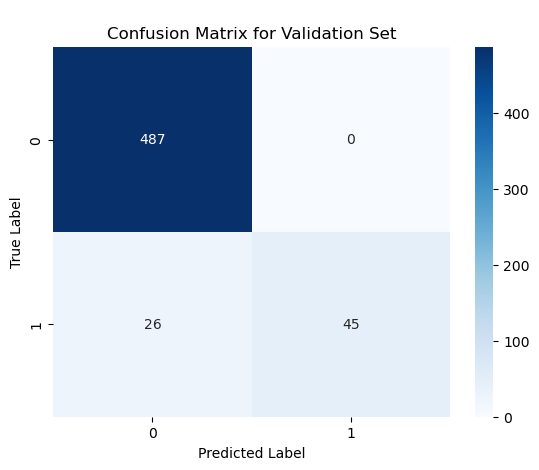

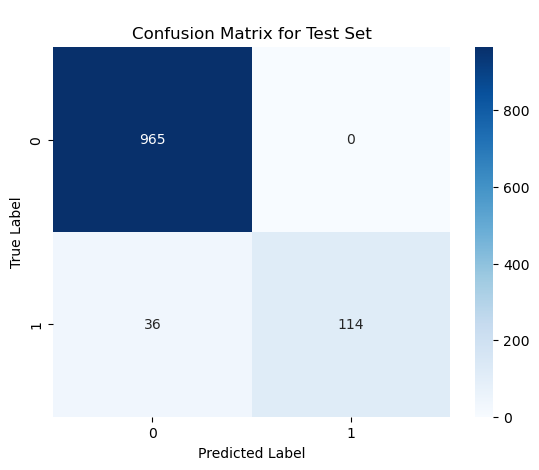

In [15]:
# Importing NaiveBayes from sklearn module
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
# Initialize the model
nb = MultinomialNB()

# Fit the model on the training data
nb.fit(X_train, y_train)

# Train the model on the training data
nb.fit(X_train, y_train)

# Predictions on the validation set
nb_y_val_pred = nb.predict(X_val)

# Evaluate the model on the validation set
print("Validation Set Evaluation:")
print(classification_report(y_val, nb_y_val_pred))

# Predictions on the test set
nb_y_test_pred = nb.predict(X_test)

# Evaluate the model on the test set
print("\nTest Set Evaluation:")
print(classification_report(y_test, nb_y_test_pred))

# Compute confusion matrix for validation set
nb_val_cm = confusion_matrix(y_val, nb_y_val_pred)

# Compute confusion matrix for test set
nb_test_cm = confusion_matrix(y_test, nb_y_test_pred)

# Function to plot confusion matrix
def plot_confusion_matrix(cm, title):
    #plt.figure(figsize=(7, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Plot confusion matrix for validation set
plot_confusion_matrix(nb_val_cm, '\nConfusion Matrix for Validation Set')

# Plot confusion matrix for test set
plot_confusion_matrix(nb_test_cm, '\nConfusion Matrix for Test Set')

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Hyperparameters for Multinomial Naive Bayes: {'alpha': 0.1}

Validation Classification Report for Multinomial Naive Bayes (Best Model):
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       487
           1       0.98      0.90      0.94        71

    accuracy                           0.99       558
   macro avg       0.99      0.95      0.97       558
weighted avg       0.99      0.99      0.99       558


Test Classification Report for Multinomial Naive Bayes (Best Model):
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       965
           1       0.93      0.91      0.92       150

    accuracy                           0.98      1115
   macro avg       0.96      0.95      0.95      1115
weighted avg       0.98      0.98      0.98      1115



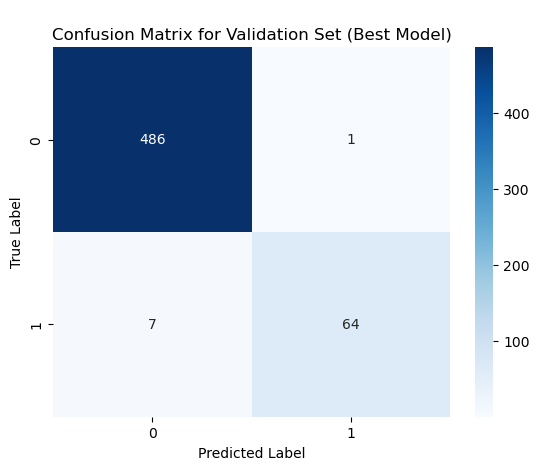

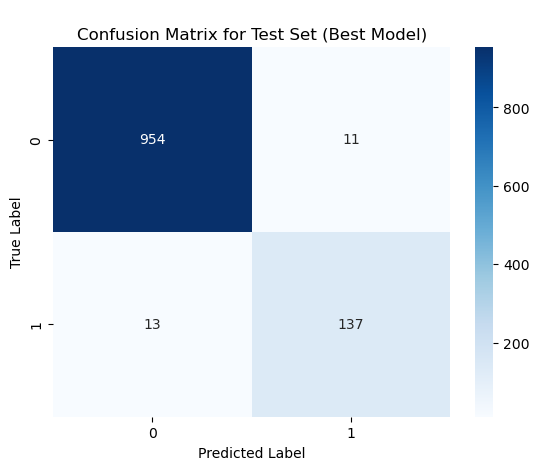

CPU times: total: 297 ms
Wall time: 336 ms


In [16]:
%%time
# Importing GridSearchCV for Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Multinomial Naive Bayes
nb_param_grid = {
    'alpha': [0.1, 0.5, 1.0, 1.5, 2.0],  # Laplace smoothing parameter
}

# Initialize GridSearchCV for Multinomial Naive Bayes
nb_grid_search = GridSearchCV(estimator=nb, param_grid=nb_param_grid, cv=5, scoring='f1', verbose=1)

# Fit GridSearchCV on training data
nb_grid_search.fit(X_train, y_train)

# Print the best hyperparameters found for Multinomial Naive Bayes
print("Best Hyperparameters for Multinomial Naive Bayes:", nb_grid_search.best_params_)

# Get the best Multinomial Naive Bayes model
nb_best_model = nb_grid_search.best_estimator_

# Evaluate the best model on validation set for Multinomial Naive Bayes
nb_y_val_pred = nb_best_model.predict(X_val)
print("\nValidation Classification Report for Multinomial Naive Bayes (Best Model):\n", classification_report(y_val, nb_y_val_pred))

# Evaluate the best model on test set for Multinomial Naive Bayes
nb_y_test_pred = nb_best_model.predict(X_test)
print("\nTest Classification Report for Multinomial Naive Bayes (Best Model):\n", classification_report(y_test, nb_y_test_pred))

# Compute confusion matrix for validation set
nb_val_cm = confusion_matrix(y_val, nb_y_val_pred)

# Compute confusion matrix for test set
nb_test_cm = confusion_matrix(y_test, nb_y_test_pred)

# Plot confusion matrix for validation set
plot_confusion_matrix(nb_val_cm,'\nConfusion Matrix for Validation Set (Best Model)')

# Plot confusion matrix for test set
plot_confusion_matrix(nb_test_cm, '\nConfusion Matrix for Test Set (Best Model)')

### Logistic Regression & Hyperparameter Tuning
<a class="anchor" id="7"></a>
[Table of Contents](#0.1)

Validation Set Evaluation:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       487
           1       1.00      0.55      0.71        71

    accuracy                           0.94       558
   macro avg       0.97      0.77      0.84       558
weighted avg       0.95      0.94      0.94       558


Test Set Evaluation:
              precision    recall  f1-score   support

           0       0.94      0.99      0.97       965
           1       0.95      0.59      0.73       150

    accuracy                           0.94      1115
   macro avg       0.94      0.79      0.85      1115
weighted avg       0.94      0.94      0.93      1115



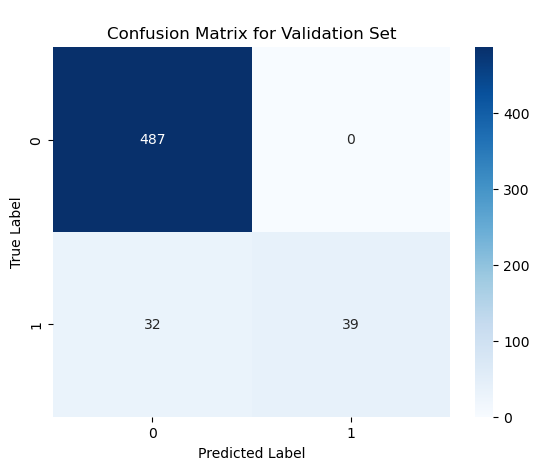

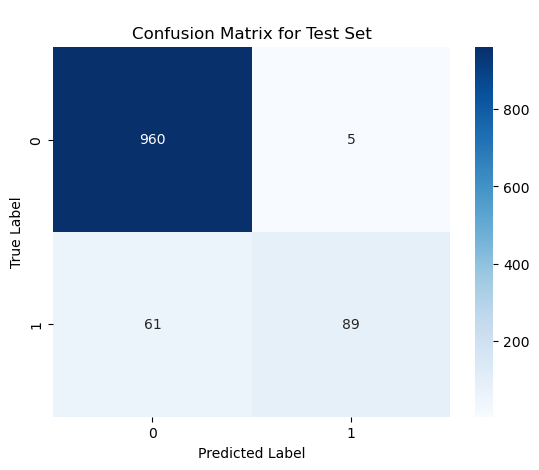

In [17]:
# Import LogisticRegression from sklearn module
from sklearn.linear_model import LogisticRegression

# Initialize the model
lr = LogisticRegression()

# Fit the model on the training data
lr.fit(X_train, y_train)

# Train the model on the training data
lr.fit(X_train, y_train)

# Predictions on the validation set
lr_y_val_pred = lr.predict(X_val)

# Evaluate the model on the validation set
print("Validation Set Evaluation:")
print(classification_report(y_val, lr_y_val_pred))

# Predictions on the test set
lr_y_test_pred = lr.predict(X_test)

# Evaluate the model on the test set
print("\nTest Set Evaluation:")
print(classification_report(y_test, lr_y_test_pred))

# Compute confusion matrix for validation set
lr_val_cm = confusion_matrix(y_val, lr_y_val_pred)

# Compute confusion matrix for test set
lr_test_cm = confusion_matrix(y_test, lr_y_test_pred)

# Plot confusion matrix for validation set
plot_confusion_matrix(lr_val_cm, '\nConfusion Matrix for Validation Set')

# Plot confusion matrix for test set
plot_confusion_matrix(lr_test_cm, '\nConfusion Matrix for Test Set')

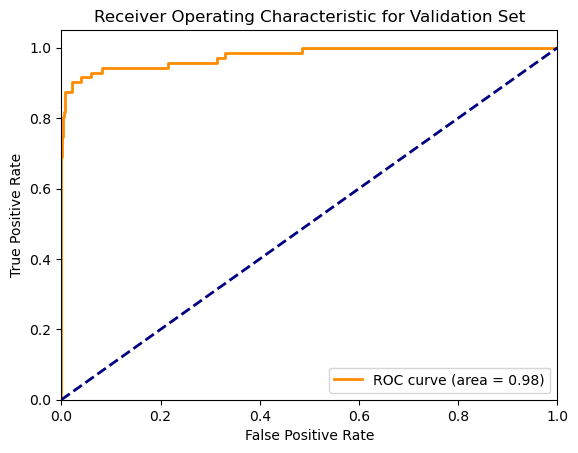

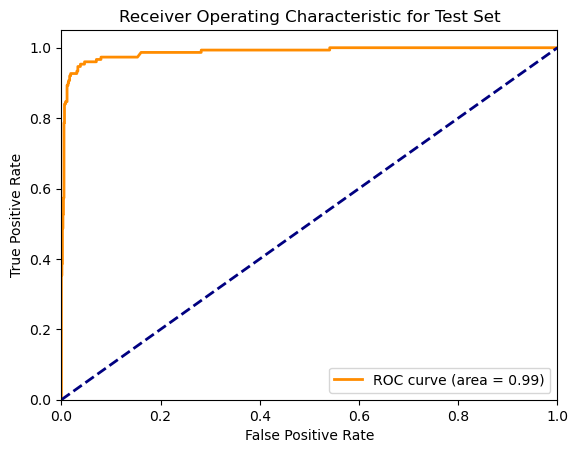

In [18]:
from sklearn.metrics import roc_curve, auc

# Compute the probabilities of the positive class
lr_y_val_prob = lr.predict_proba(X_val)[:, 1]
lr_y_test_prob = lr.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area for validation set
fpr_val, tpr_val, _ = roc_curve(y_val, lr_y_val_prob)
roc_auc_val = auc(fpr_val, tpr_val)

# Compute ROC curve and ROC area for test set
fpr_test, tpr_test, _ = roc_curve(y_test, lr_y_test_prob)
roc_auc_test = auc(fpr_test, tpr_test)

# Plot ROC curve for validation set
plt.figure()
plt.plot(fpr_val, tpr_val, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_val)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Validation Set')
plt.legend(loc="lower right")
plt.show()

# Plot ROC curve for test set
plt.figure()
plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Test Set')
plt.legend(loc="lower right")
plt.show()


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Hyperparameters: {'C': 10, 'penalty': 'l2'}

Validation Classification Report (Best Model):
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       487
           1       0.98      0.75      0.85        71

    accuracy                           0.97       558
   macro avg       0.97      0.87      0.91       558
weighted avg       0.97      0.97      0.96       558


Test Classification Report (Best Model):
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       965
           1       0.98      0.81      0.88       150

    accuracy                           0.97      1115
   macro avg       0.97      0.90      0.93      1115
weighted avg       0.97      0.97      0.97      1115



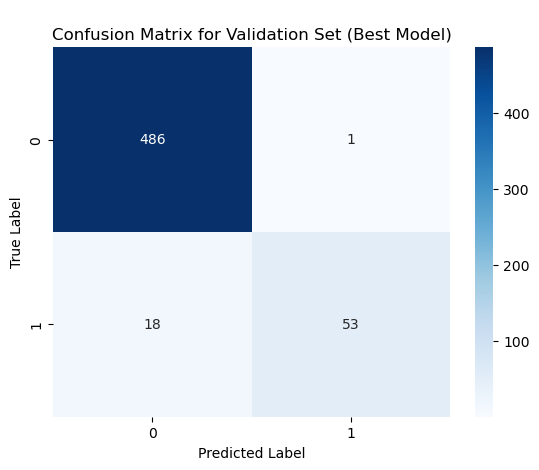

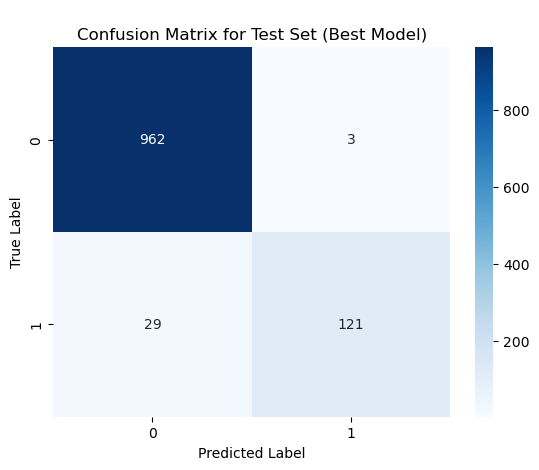

CPU times: total: 2.83 s
Wall time: 655 ms


In [19]:
%%time
# Define the parameter grid
lr_param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],  # Inverse of regularization strength
    'penalty': ['l1', 'l2']  # Regularization penalty type
}

# Initialize GridSearchCV
lr_grid_search = GridSearchCV(estimator=lr, param_grid=lr_param_grid, cv=5, scoring='f1', verbose=1)

# Fit GridSearchCV on training data
lr_grid_search.fit(X_train, y_train)

# Print the best hyperparameters found
print("Best Hyperparameters:", lr_grid_search.best_params_)

# Get the best model
lr_best_model = lr_grid_search.best_estimator_

# Evaluate the best model on validation set
lr_y_val_pred = lr_best_model.predict(X_val)
print("\nValidation Classification Report (Best Model):\n", classification_report(y_val, lr_y_val_pred))

# Evaluate the best model on test set
lr_y_test_pred = lr_best_model.predict(X_test)
print("\nTest Classification Report (Best Model):\n", classification_report(y_test, lr_y_test_pred))

# Compute confusion matrix for validation set
lr_val_cm = confusion_matrix(y_val, lr_y_val_pred)

# Compute confusion matrix for test set
lr_test_cm = confusion_matrix(y_test, lr_y_test_pred)

# Plot confusion matrix for validation set
plot_confusion_matrix(lr_val_cm, '\nConfusion Matrix for Validation Set (Best Model)')

# Plot confusion matrix for test set
plot_confusion_matrix(lr_test_cm, '\nConfusion Matrix for Test Set (Best Model)')

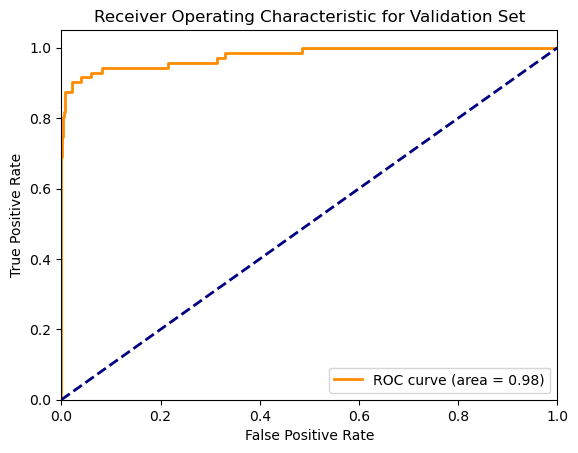

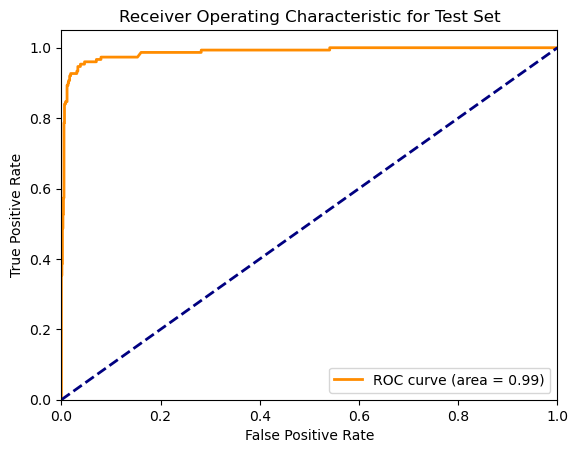

In [20]:
# Compute the probabilities of the positive class
lr_y_val_prob = lr.predict_proba(X_val)[:, 1]
lr_y_test_prob = lr.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area for validation set
fpr_val, tpr_val, _ = roc_curve(y_val, lr_y_val_prob)
roc_auc_val = auc(fpr_val, tpr_val)

# Compute ROC curve and ROC area for test set
fpr_test, tpr_test, _ = roc_curve(y_test, lr_y_test_prob)
roc_auc_test = auc(fpr_test, tpr_test)

# Plot ROC curve for validation set
plt.figure()
plt.plot(fpr_val, tpr_val, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_val)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Validation Set')
plt.legend(loc="lower right")
plt.show()

# Plot ROC curve for test set
plt.figure()
plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Test Set')
plt.legend(loc="lower right")
plt.show()


### Support Vector Machine & Hyparameter Tuning
<a class="anchor" id="8"></a>
[Table of Contents](#0.1)

Validation Set Evaluation:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       487
           1       0.98      0.79      0.88        71

    accuracy                           0.97       558
   macro avg       0.98      0.89      0.93       558
weighted avg       0.97      0.97      0.97       558


Test Set Evaluation:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.98      0.85      0.91       150

    accuracy                           0.98      1115
   macro avg       0.98      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



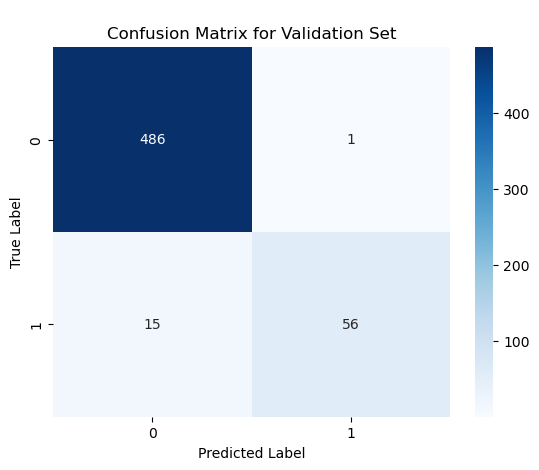

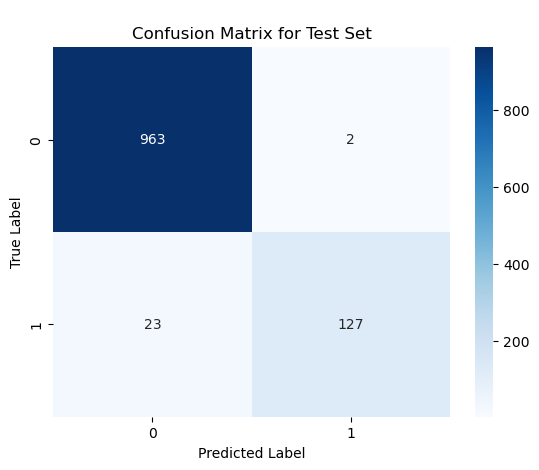

In [21]:
# Import SupportVectorMachine from sklearn module
from sklearn.svm import SVC

# Initialize the model
svc = SVC(kernel='linear')

# Fit the model on the training data
svc.fit(X_train, y_train)

# Train the model on the training data
svc.fit(X_train, y_train)

# Predictions on the validation set
svc_y_val_pred = svc.predict(X_val)

# Evaluate the model on the validation set
print("Validation Set Evaluation:")
print(classification_report(y_val, svc_y_val_pred))

# Predictions on the test set
svc_y_test_pred = svc.predict(X_test)

# Evaluate the model on the test set
print("\nTest Set Evaluation:")
print(classification_report(y_test, svc_y_test_pred))

# Compute confusion matrix for validation set
svc_val_cm = confusion_matrix(y_val, svc_y_val_pred)

# Compute confusion matrix for test set
svc_test_cm = confusion_matrix(y_test, svc_y_test_pred)

# Plot confusion matrix for validation set
plot_confusion_matrix(svc_val_cm, '\nConfusion Matrix for Validation Set')

# Plot confusion matrix for test set
plot_confusion_matrix(svc_test_cm, '\nConfusion Matrix for Test Set')

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best Hyperparameters for Support Vector Machine: {'C': 10, 'kernel': 'linear'}

Validation Classification Report for Support Vector Machine (Best Model):
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       487
           1       0.98      0.82      0.89        71

    accuracy                           0.97       558
   macro avg       0.98      0.91      0.94       558
weighted avg       0.98      0.97      0.97       558


Test Classification Report for Support Vector Machine (Best Model):
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       965
           1       0.97      0.83      0.90       150

    accuracy                           0.97      1115
   macro avg       0.97      0.91      0.94      1115
weighted avg       0.97      0.97      0.97      1115



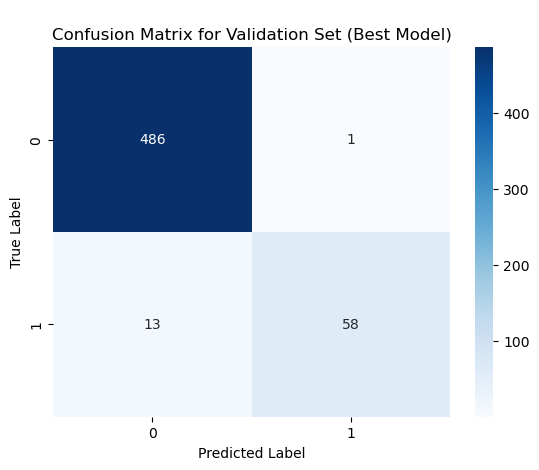

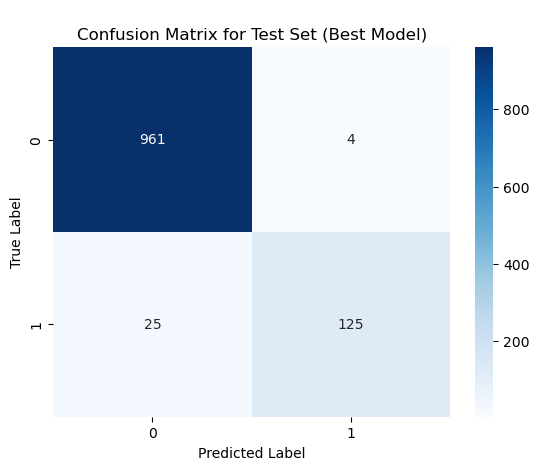

CPU times: total: 12.6 s
Wall time: 12.8 s


In [22]:
%%time
# Define the parameter grid for Support Vector Machine
svc_param_grid = {
    'C': [0.1, 1, 10],          # Regularization parameter
    'kernel': ['linear', 'rbf'] # Kernel type
}


# Initialize GridSearchCV for Support Vector Machine
svc_grid_search = GridSearchCV(estimator=svc, param_grid=svc_param_grid, cv=5, scoring='f1', verbose=1)

# Fit GridSearchCV on training data
svc_grid_search.fit(X_train, y_train)

# Print the best hyperparameters found for Support Vector Machine
print("Best Hyperparameters for Support Vector Machine:", svc_grid_search.best_params_)

# Get the best Support Vector Machine model
svc_best_model = svc_grid_search.best_estimator_

# Evaluate the best model on validation set for Support Vector Machine
svc_y_val_pred = svc_best_model.predict(X_val)
print("\nValidation Classification Report for Support Vector Machine (Best Model):\n", classification_report(y_val, svc_y_val_pred))

# Evaluate the best model on test set for Support Vector Machine
svc_y_test_pred = svc_best_model.predict(X_test)
print("\nTest Classification Report for Support Vector Machine (Best Model):\n", classification_report(y_test, svc_y_test_pred))

# Compute confusion matrix for validation set
svc_val_cm = confusion_matrix(y_val, svc_y_val_pred)

# Compute confusion matrix for test set
svc_test_cm = confusion_matrix(y_test, svc_y_test_pred)

# Plot confusion matrix for validation set
plot_confusion_matrix(svc_val_cm, '\nConfusion Matrix for Validation Set (Best Model)')

# Plot confusion matrix for test set
plot_confusion_matrix(svc_test_cm, '\nConfusion Matrix for Test Set (Best Model)')

## Balancing Data
<a class="anchor" id="9"></a>
[Table of Contents](#0.1)

In [23]:
# Balancing the data
from imblearn.over_sampling import SMOTE
# Apply SMOTE to the training data
smote = SMOTE(random_state=random_seed)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

## Naive Bayes & Hyperparameter Tuning
<a class="anchor" id="10"></a>
[Table of Contents](#0.1)

Validation Set Evaluation:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       487
           1       0.85      0.89      0.87        71

    accuracy                           0.97       558
   macro avg       0.92      0.93      0.92       558
weighted avg       0.97      0.97      0.97       558


Test Set Evaluation:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       965
           1       0.85      0.91      0.88       150

    accuracy                           0.97      1115
   macro avg       0.92      0.94      0.93      1115
weighted avg       0.97      0.97      0.97      1115



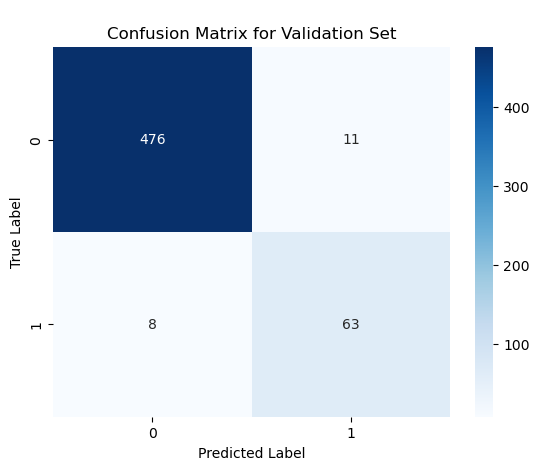

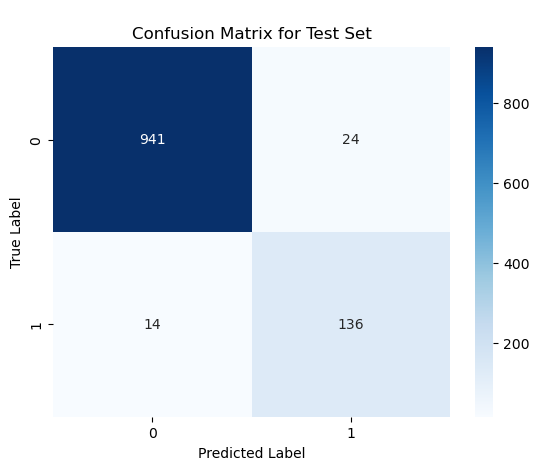

In [24]:
# Train the model on the training data
nb.fit(X_train_sm, y_train_sm)

# Predictions on the validation set
nbsm_y_val_pred = nb.predict(X_val)

# Evaluate the model on the validation set
print("Validation Set Evaluation:")
print(classification_report(y_val, nbsm_y_val_pred))

# Predictions on the test set
nbsm_y_test_pred = nb.predict(X_test)

# Evaluate the model on the test set
print("\nTest Set Evaluation:")
print(classification_report(y_test, nbsm_y_test_pred))

# Compute confusion matrix for validation set
nbsm_val_cm = confusion_matrix(y_val, nbsm_y_val_pred)

# Compute confusion matrix for test set
nbsm_test_cm = confusion_matrix(y_test, nbsm_y_test_pred)

# Plot confusion matrix for validation set
plot_confusion_matrix(nbsm_val_cm, '\nConfusion Matrix for Validation Set')

# Plot confusion matrix for test set
plot_confusion_matrix(nbsm_test_cm, '\nConfusion Matrix for Test Set')

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Hyperparameters for Multinomial Naive Bayes: {'alpha': 0.1}

Validation Classification Report for Multinomial Naive Bayes (Best Model):
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       487
           1       0.91      0.87      0.89        71

    accuracy                           0.97       558
   macro avg       0.95      0.93      0.94       558
weighted avg       0.97      0.97      0.97       558


Test Classification Report for Multinomial Naive Bayes (Best Model):
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       965
           1       0.87      0.88      0.88       150

    accuracy                           0.97      1115
   macro avg       0.93      0.93      0.93      1115
weighted avg       0.97      0.97      0.97      1115



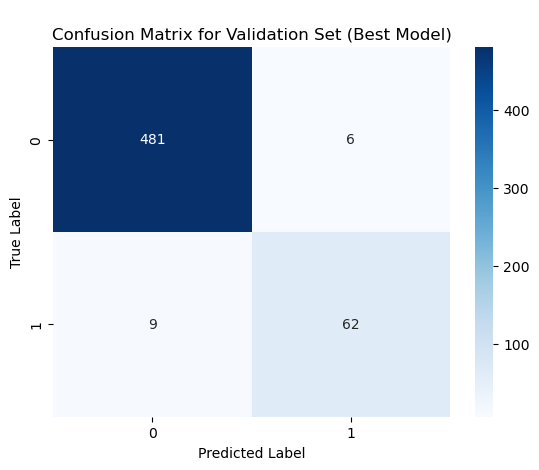

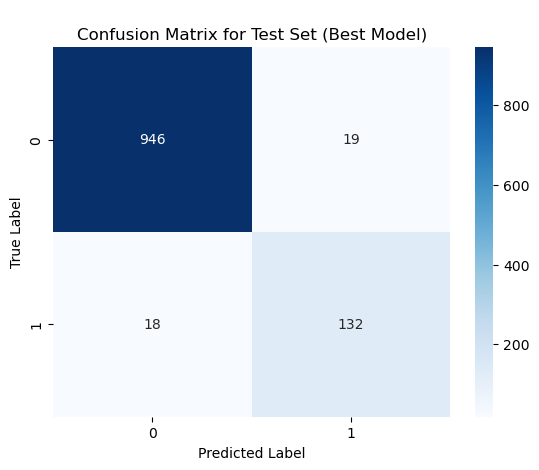

CPU times: total: 297 ms
Wall time: 353 ms


In [25]:
%%time
# Initialize GridSearchCV for Multinomial Naive Bayes
nbsm_grid_search = GridSearchCV(estimator=nb, param_grid=nb_param_grid, cv=5, scoring='f1', verbose=1)

# Fit GridSearchCV on training data
nbsm_grid_search.fit(X_train_sm, y_train_sm)

# Print the best hyperparameters found for Multinomial Naive Bayes
print("Best Hyperparameters for Multinomial Naive Bayes:", nbsm_grid_search.best_params_)

# Get the best Multinomial Naive Bayes model
nbsm_best_model = nbsm_grid_search.best_estimator_

# Evaluate the best model on validation set for Multinomial Naive Bayes
nbsm_y_val_pred = nbsm_best_model.predict(X_val)
print("\nValidation Classification Report for Multinomial Naive Bayes (Best Model):\n", classification_report(y_val, nbsm_y_val_pred))

# Evaluate the best model on test set for Multinomial Naive Bayes
nbsm_y_test_pred = nbsm_best_model.predict(X_test)
print("\nTest Classification Report for Multinomial Naive Bayes (Best Model):\n", classification_report(y_test, nbsm_y_test_pred))

# Compute confusion matrix for validation set
nbsm_val_cm = confusion_matrix(y_val, nbsm_y_val_pred)

# Compute confusion matrix for test set
nbsm_test_cm = confusion_matrix(y_test, nbsm_y_test_pred)

# Plot confusion matrix for validation set
plot_confusion_matrix(nbsm_val_cm, '\nConfusion Matrix for Validation Set (Best Model)')

# Plot confusion matrix for test set
plot_confusion_matrix(nbsm_test_cm, '\nConfusion Matrix for Test Set (Best Model)')

## Logistic Regression & Hyperparameter Tuning
<a class="anchor" id="11"></a>
[Table of Contents](#0.1)

Validation Set Evaluation:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       487
           1       0.97      0.82      0.89        71

    accuracy                           0.97       558
   macro avg       0.97      0.91      0.94       558
weighted avg       0.97      0.97      0.97       558


Test Set Evaluation:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       965
           1       0.94      0.85      0.90       150

    accuracy                           0.97      1115
   macro avg       0.96      0.92      0.94      1115
weighted avg       0.97      0.97      0.97      1115



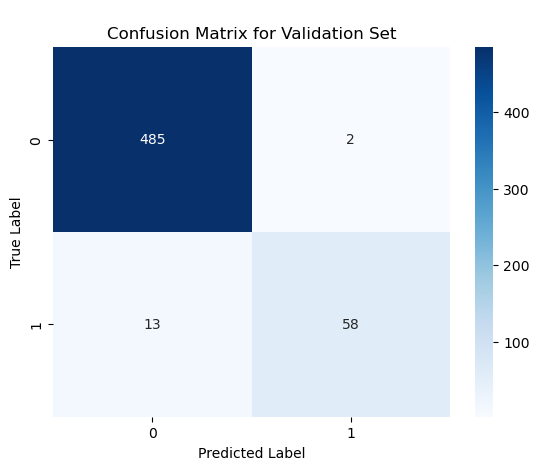

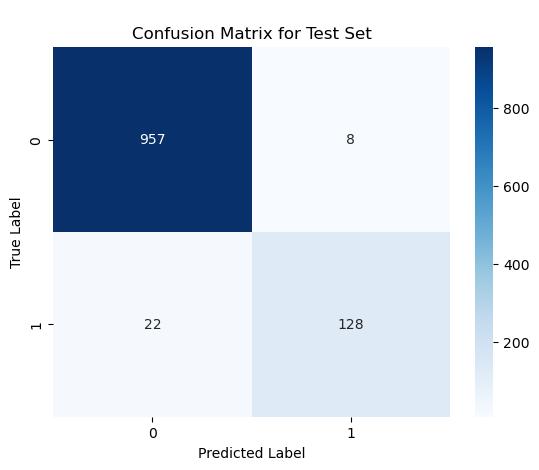

In [26]:
# Train the model on the training data
lr.fit(X_train_sm, y_train_sm)

# Predictions on the validation set
lrsm_y_val_pred = lr.predict(X_val)

# Evaluate the model on the validation set
print("Validation Set Evaluation:")
print(classification_report(y_val, lrsm_y_val_pred))

# Predictions on the test set
lrsm_y_test_pred = lr.predict(X_test)

# Evaluate the model on the test set
print("\nTest Set Evaluation:")
print(classification_report(y_test, lrsm_y_test_pred))

# Compute confusion matrix for validation set
lrsm_val_cm = confusion_matrix(y_val, lrsm_y_val_pred)

# Compute confusion matrix for test set
lrsm_test_cm = confusion_matrix(y_test, lrsm_y_test_pred)

# Plot confusion matrix for validation set
plot_confusion_matrix(lrsm_val_cm, '\nConfusion Matrix for Validation Set')

# Plot confusion matrix for test set
plot_confusion_matrix(lrsm_test_cm, '\nConfusion Matrix for Test Set')

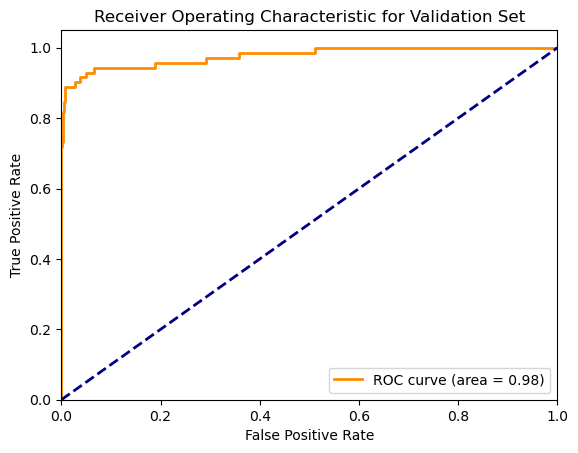

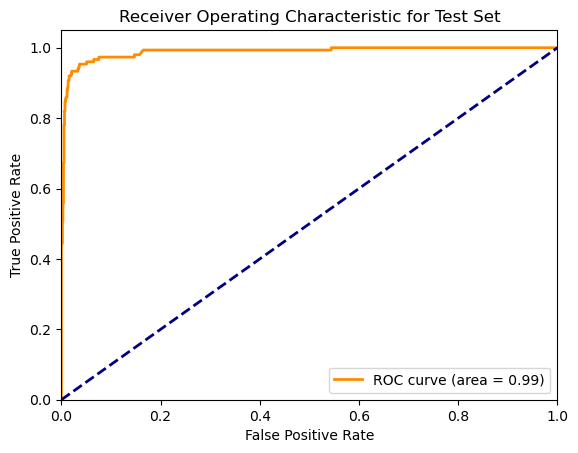

In [27]:
# Compute the probabilities of the positive class
lrsm_y_val_prob = lr.predict_proba(X_val)[:, 1]
lrsm_y_test_prob = lr.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area for validation set
fpr_val, tpr_val, _ = roc_curve(y_val, lrsm_y_val_prob)
roc_auc_val = auc(fpr_val, tpr_val)

# Compute ROC curve and ROC area for test set
fpr_test, tpr_test, _ = roc_curve(y_test, lrsm_y_test_prob)
roc_auc_test = auc(fpr_test, tpr_test)

# Plot ROC curve for validation set
plt.figure()
plt.plot(fpr_val, tpr_val, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_val)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Validation Set')
plt.legend(loc="lower right")
plt.show()

# Plot ROC curve for test set
plt.figure()
plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Test Set')
plt.legend(loc="lower right")
plt.show()


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Hyperparameters: {'C': 10, 'penalty': 'l2'}

Validation Classification Report (Best Model):
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       487
           1       0.97      0.83      0.89        71

    accuracy                           0.97       558
   macro avg       0.97      0.91      0.94       558
weighted avg       0.97      0.97      0.97       558


Test Classification Report (Best Model):
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       965
           1       0.96      0.85      0.90       150

    accuracy                           0.97      1115
   macro avg       0.97      0.92      0.94      1115
weighted avg       0.97      0.97      0.97      1115



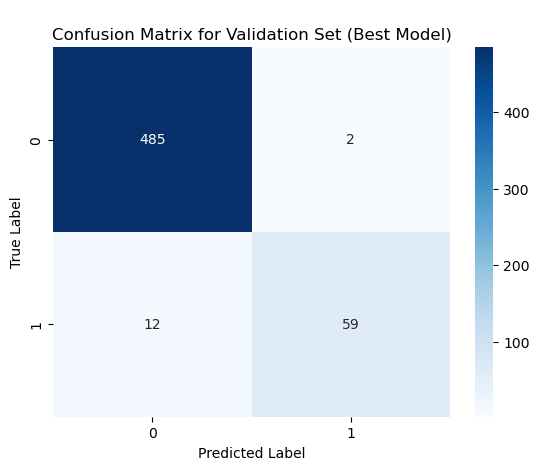

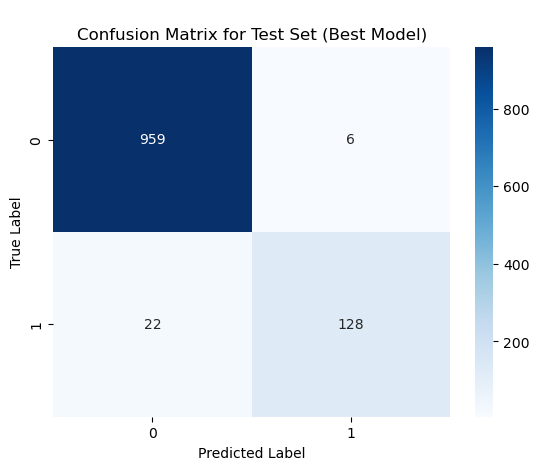

CPU times: total: 2.7 s
Wall time: 635 ms


In [28]:
%%time

# Initialize GridSearchCV
lrsm_grid_search = GridSearchCV(estimator=lr, param_grid=lr_param_grid, cv=5, scoring='f1', verbose=1)

# Fit GridSearchCV on training data
lrsm_grid_search.fit(X_train_sm, y_train_sm)

# Print the best hyperparameters found
print("Best Hyperparameters:", lrsm_grid_search.best_params_)

# Get the best model
lrsm_best_model = lrsm_grid_search.best_estimator_

# Evaluate the best model on validation set
lrsm_y_val_pred = lrsm_best_model.predict(X_val)
print("\nValidation Classification Report (Best Model):\n", classification_report(y_val, lrsm_y_val_pred))

# Evaluate the best model on test set
lrsm_y_test_pred = lrsm_best_model.predict(X_test)
print("\nTest Classification Report (Best Model):\n", classification_report(y_test, lrsm_y_test_pred))

# Compute confusion matrix for validation set
lrsm_val_cm = confusion_matrix(y_val, lrsm_y_val_pred)

# Compute confusion matrix for test set
lrsm_test_cm = confusion_matrix(y_test, lrsm_y_test_pred)

# Plot confusion matrix for validation set
plot_confusion_matrix(lrsm_val_cm, '\nConfusion Matrix for Validation Set (Best Model)')

# Plot confusion matrix for test set
plot_confusion_matrix(lrsm_test_cm, '\nConfusion Matrix for Test Set (Best Model)')

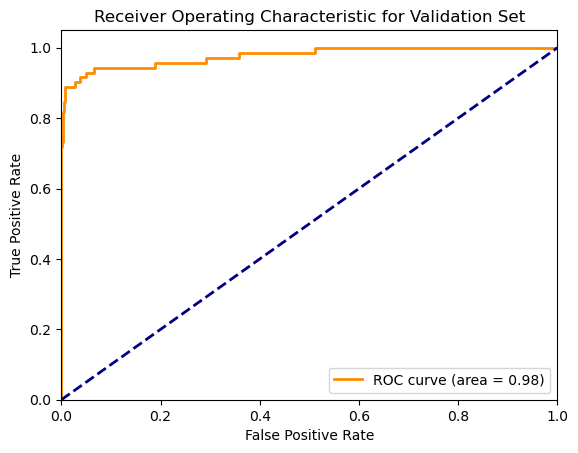

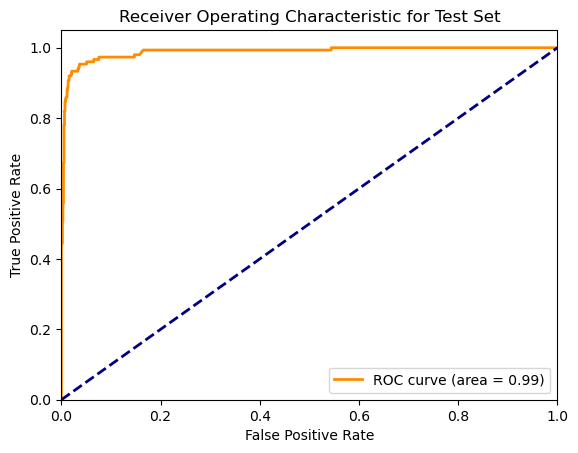

In [29]:
# Compute the probabilities of the positive class
lrsm_y_val_prob = lr.predict_proba(X_val)[:, 1]
lrsm_y_test_prob = lr.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area for validation set
fpr_val, tpr_val, _ = roc_curve(y_val, lrsm_y_val_prob)
roc_auc_val = auc(fpr_val, tpr_val)

# Compute ROC curve and ROC area for test set
fpr_test, tpr_test, _ = roc_curve(y_test, lrsm_y_test_prob)
roc_auc_test = auc(fpr_test, tpr_test)

# Plot ROC curve for validation set
plt.figure()
plt.plot(fpr_val, tpr_val, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_val)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Validation Set')
plt.legend(loc="lower right")
plt.show()

# Plot ROC curve for test set
plt.figure()
plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Test Set')
plt.legend(loc="lower right")
plt.show()


## Support Vector Machine & Hyperparameter Tuning
<a class="anchor" id="12"></a>
[Table of Contents](#0.1)

Validation Set Evaluation:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       487
           1       0.98      0.82      0.89        71

    accuracy                           0.97       558
   macro avg       0.98      0.91      0.94       558
weighted avg       0.98      0.97      0.97       558


Test Set Evaluation:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.97      0.85      0.91       150

    accuracy                           0.98      1115
   macro avg       0.97      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



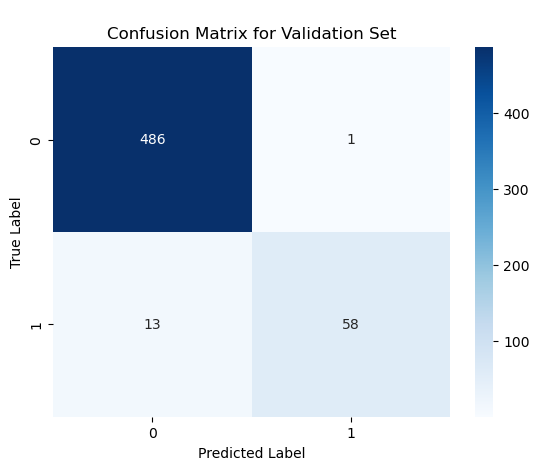

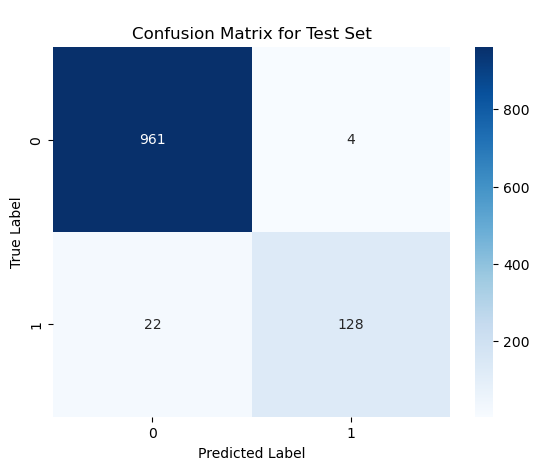

In [30]:
# Train the model on the training data
svc.fit(X_train_sm, y_train_sm)

# Predictions on the validation set
svcsm_y_val_pred = svc.predict(X_val)

# Evaluate the model on the validation set
print("Validation Set Evaluation:")
print(classification_report(y_val, svcsm_y_val_pred))

# Predictions on the test set
svcsm_y_test_pred = svc.predict(X_test)

# Evaluate the model on the test set
print("\nTest Set Evaluation:")
print(classification_report(y_test, svcsm_y_test_pred))

# Compute confusion matrix for validation set
svcsm_val_cm = confusion_matrix(y_val, svcsm_y_val_pred)

# Compute confusion matrix for test set
svcsm_test_cm = confusion_matrix(y_test, svcsm_y_test_pred)

# Plot confusion matrix for validation set
plot_confusion_matrix(svcsm_val_cm, '\nConfusion Matrix for Validation Set')

# Plot confusion matrix for test set
plot_confusion_matrix(svcsm_test_cm, '\nConfusion Matrix for Test Set')

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best Hyperparameters for Support Vector Machine: {'C': 10, 'kernel': 'rbf'}

Validation Classification Report for Support Vector Machine (Best Model):
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       487
           1       1.00      0.76      0.86        71

    accuracy                           0.97       558
   macro avg       0.98      0.88      0.92       558
weighted avg       0.97      0.97      0.97       558


Test Classification Report for Support Vector Machine (Best Model):
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       965
           1       0.97      0.83      0.90       150

    accuracy                           0.97      1115
   macro avg       0.97      0.91      0.94      1115
weighted avg       0.97      0.97      0.97      1115



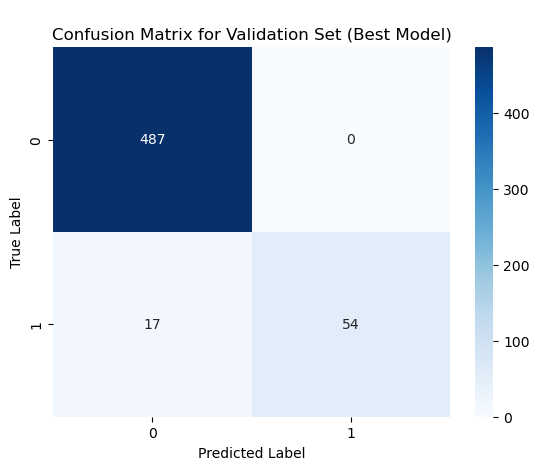

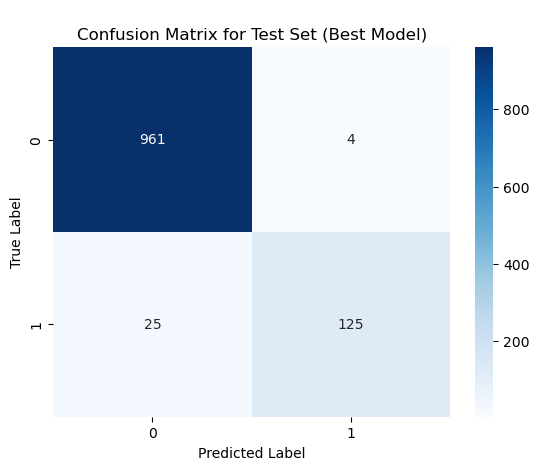

CPU times: total: 38.4 s
Wall time: 38.7 s


In [31]:
%%time
# Initialize GridSearchCV for Support Vector Machine
svcsm_grid_search = GridSearchCV(estimator=svc, param_grid=svc_param_grid, cv=5, scoring='f1', verbose=1)

# Fit GridSearchCV on training data
svcsm_grid_search.fit(X_train_sm, y_train_sm)

# Print the best hyperparameters found for Support Vector Machine
print("Best Hyperparameters for Support Vector Machine:", svcsm_grid_search.best_params_)

# Get the best Support Vector Machine model
svcsm_best_model = svcsm_grid_search.best_estimator_

# Evaluate the best model on validation set for Support Vector Machine
svcsm_y_val_pred = svcsm_best_model.predict(X_val)
print("\nValidation Classification Report for Support Vector Machine (Best Model):\n", classification_report(y_val, svcsm_y_val_pred))

# Evaluate the best model on test set for Support Vector Machine
svcsm_y_test_pred = svc_best_model.predict(X_test)
print("\nTest Classification Report for Support Vector Machine (Best Model):\n", classification_report(y_test, svcsm_y_test_pred))

# Compute confusion matrix for validation set
svcsm_val_cm = confusion_matrix(y_val, svcsm_y_val_pred)

# Compute confusion matrix for test set
svcsm_test_cm = confusion_matrix(y_test, svcsm_y_test_pred)

# Plot confusion matrix for validation set
plot_confusion_matrix(svcsm_val_cm, '\nConfusion Matrix for Validation Set (Best Model)')

# Plot confusion matrix for test set
plot_confusion_matrix(svcsm_test_cm, '\nConfusion Matrix for Test Set (Best Model)')

## Evaluation
<a class="anchor" id="13"></a>
[Table of Contents](#0.1)

In [32]:
%%time
# Define a function to get classification report for a model
def get_classification_report(model, X, y):
    y_pred = model.predict(X)
    report = classification_report(y, y_pred, output_dict=True)
    return report

report = []

# Get classification reports for all unbalanced class models
nb_classification_report = get_classification_report(nb_best_model, X_test, y_test)
lr_classification_report = get_classification_report(lr_best_model, X_test, y_test)
svc_classification_report = get_classification_report(svc_best_model, X_test, y_test)

report.append(nb_classification_report)
report.append(lr_classification_report)
report.append(svc_classification_report)

# Get classification reports for all balanced class models
nbsm_classification_report = get_classification_report(nbsm_best_model, X_test, y_test)
lrsm_classification_report = get_classification_report(lrsm_best_model, X_test, y_test)
svcsm_classification_report = get_classification_report(svcsm_best_model, X_test, y_test)

report.append(nbsm_classification_report)
report.append(lrsm_classification_report)
report.append(svcsm_classification_report)

CPU times: total: 234 ms
Wall time: 251 ms


In [33]:
# Define a function to extract metrics from report
def extract_metrics(report, model_name):
    metrics = {
        'Model': model_name,
        'Accuracy': report['accuracy'],
        'Precision (Class 0)': report['0']['precision'],
        'Precision (Class 1)': report['1']['precision'],
        'Recall (Class 0)': report['0']['recall'],
        'Recall (Class 1)': report['1']['recall'],
        'F1-score (Class 0)': report['0']['f1-score'],
        'F1-score (Class 1)': report['1']['f1-score']
    }
    return metrics

# Extract metrics for all models
metrics = []
models = ['nb_best_model', 'nbsm_best_model', 'lr_best_model', 'lrsm_best_model', 'svc_best_model', 'svcsm_best_model']
reports = [nb_classification_report, nbsm_classification_report, lr_classification_report, lrsm_classification_report, svc_classification_report, svcsm_classification_report]

for model, report in zip(models, reports):
    metrics.append(extract_metrics(report, model))

# Create a DataFrame
stats = pd.DataFrame(metrics)
stats


,Model,Accuracy,Precision (Class 0),Precision (Class 1),Recall (Class 0),Recall (Class 1),F1-score (Class 0),F1-score (Class 1)
0,nb_best_model,0.978475,0.986556,0.925676,0.988601,0.913333,0.987578,0.919463
1,nbsm_best_model,0.966816,0.981328,0.874172,0.980311,0.880000,0.980819,0.877076
2,lr_best_model,0.971300,0.970737,0.975806,0.996891,0.806667,0.983640,0.883212
3,lrsm_best_model,0.974888,0.977574,0.955224,0.993782,0.853333,0.985612,0.901408
4,svc_best_model,0.973991,0.974645,0.968992,0.995855,0.833333,0.985136,0.896057
5,svcsm_best_model,0.973094,0.970796,0.991803,0.998964,0.806667,0.984678,0.889706


## Deployment
<a class="anchor" id="14"></a>
[Table of Contents](#0.1)

In [34]:
# Save the model to a file
joblib.dump(model, 'nb_best_model.pkl')

['nb_best_model.pkl']

In the process of deploying our machine learning model, we ensure to preserve the most optimal model. This involves storing the model that has demonstrated superior performance during the training phase. This crucial step allows us to utilize the same trained model for future predictions, thereby maintaining consistency and reliability in our application’s output. This forms an integral part of our project’s narrative. 

## Intrepretation & Conclusion
<a class="anchor" id="15"></a>
[Table of Contents](#0.1)


This table shows the performance of six different models on a classification task. Three of these models (`nb_best_model`, `lr_best_model`, `svc_best_model`) are trained on unbalanced classes, and the other three (`nbsm_best_model`, `lrsm_best_model`, `svcsm_best_model`) are trained on balanced classes. The models are evaluated based on several metrics: Accuracy, Precision, Recall, and F1-score. These metrics are calculated for two classes: Class 0 and Class 1. Here's a brief explanation of each metric:

- **Accuracy**: This is the proportion of total predictions that are correct. It is a common evaluation metric for classification problems. Among the unbalanced class models, the `nb_best_model` has the highest accuracy of 0.978475, meaning it correctly predicted the class for about 97.85% of the instances in the test set. Among the balanced class models, the `lrsm_best_model` has the highest accuracy of 0.974888.

- **Precision**: This is the proportion of positive predictions that are actually correct. For Class 0, `nb_best_model` (unbalanced) has the highest precision (0.986556), and for Class 1, `svcsm_best_model` (balanced) has the highest precision (0.991803).

- **Recall**: This is the proportion of actual positive instances that the model correctly predicted. For Class 0, `svcsm_best_model` (balanced) has the highest recall (0.998964), and for Class 1, `nbsm_best_model` (balanced) has the highest recall (0.880000).

- **F1-score**: This is the harmonic mean of Precision and Recall, and it tries to balance these two metrics. An F1-score reaches its best value at 1 (perfect precision and recall) and worst at 0. For Class 0, `nb_best_model` (unbalanced) has the highest F1-score (0.987578), and for Class 1, `lrsm_best_model` (balanced) has the highest F1-score (0.901408).

In summary, among the unbalanced class models, `nb_best_model` performs the best in terms of Accuracy, Precision for Class 0, and F1-score for Class 0. Among the balanced class models, `svcsm_best_model` has the highest Precision for Class 1 and Recall for Class 0, while `lrsm_best_model` has the highest Accuracy and F1-score for Class 1. 

In the context of spam SMS detection, you would typically want a model that has a high recall for the spam class (Class 1). This is because you want to catch as many spam messages as possible, even if it means that some non-spam messages get incorrectly classified as spam.

From the models I've trained, the `nbsm_best_model` (balanced) has the highest recall for Class 1 (spam). This means that it's the best at correctly identifying spam messages. However, its precision for Class 1 is lower than some of the other models, which means it's more likely to incorrectly classify non-spam messages as spam.

If incorrectly classifying non-spam messages as spam is a concern, you might want to consider a model with a higher precision for Class 1, like the `svcsm_best_model` (balanced). This model is less likely to classify non-spam messages as spam, but it might miss some spam messages.

Finally, the `lrsm_best_model` (balanced) has the highest F1-score for Class 1, which means it strikes the best balance between precision and recall for the spam class.

In conclusion, the "best" model depends on your specific needs. If catching as many spam messages as possible is your main goal, `nbsm_best_model` might be the best choice. If avoiding false positives is more important, `svcsm_best_model` might be better. If you want a balance of both, `lrsm_best_model` might be the best choice. Therefore, based on the model performance and your goal of detecting spam SMS messages, I'd recommend choosing `nb_best_model` (naive Bayes model trained on unbalanced data) as it offers the best balance between precision and recall, ultimately maximizing the effectiveness of spam detection while minimizing false positives and false negatives.

## References
<a class="anchor" id="16"></a>
[Table of Contents](#0.1)

`www.kaggle.com`
`www.google.com`
`www.stackoverflow.com`
`www.coursera.org`
`www.copilot.com`